<a href="https://colab.research.google.com/github/Shaadalam9/Shaadalam9/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving train.csv to train (6).csv


In [3]:
import io 
df = pd.read_csv(io.BytesIO(data_to_load['train.csv']))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df=df.drop("Name",axis=1)
df=df.drop("Ticket",axis=1)
df=df.drop("Cabin",axis=1)
df=df.drop("PassengerId",axis=1)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
age = df.iloc[:,3].values
Embarked=df.iloc[:,7].values
age=age.reshape(-1, 1)
Embarked=Embarked.reshape(-1, 1)
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
imputer1 = imputer1.fit(age)
age = imputer1.transform(age)
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer2 = imputer2.fit(Embarked)
Embarked = imputer2.transform(Embarked)

In [7]:
df=df.drop("Age",axis=1)
df=df.drop("Embarked",axis=1)

In [8]:
age=pd.DataFrame(age)
Embarked=pd.DataFrame(Embarked)
df=pd.concat([df,age,Embarked],axis=1)

In [9]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,0,0
0,0,3,male,1,0,7.2500,22.0,S
1,1,1,female,1,0,71.2833,38.0,C
2,1,3,female,0,0,7.9250,26.0,S
3,1,1,female,1,0,53.1000,35.0,S
4,0,3,male,0,0,8.0500,35.0,S
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.0,S
887,1,1,female,0,0,30.0000,19.0,S
888,0,3,female,1,2,23.4500,28.0,S
889,1,1,male,0,0,30.0000,26.0,C


In [10]:
df.columns=["Survived","Pclass","Sex","SibSp","Parch","Fare","Age","Embarked"]

In [11]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [12]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,0,3,male,1,0,7.2500,22.0,S
1,1,1,female,1,0,71.2833,38.0,C
2,1,3,female,0,0,7.9250,26.0,S
3,1,1,female,1,0,53.1000,35.0,S
4,0,3,male,0,0,8.0500,35.0,S
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.0,S
887,1,1,female,0,0,30.0000,19.0,S
888,0,3,female,1,2,23.4500,28.0,S
889,1,1,male,0,0,30.0000,26.0,C


In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Age       891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [14]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
ct=make_column_transformer(
    (MinMaxScaler(),["Age","Fare"]),
    (OneHotEncoder(handle_unknown="ignore"),["Sex","Embarked","Pclass","SibSp"])
) 
ct.fit(x)
x_train=ct.transform(x)

In [15]:
x_train

array([[0.27117366, 0.01415106, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4722292 , 0.13913574, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32143755, 0.01546857, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34656949, 0.04577135, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32143755, 0.0585561 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39683338, 0.01512699, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [16]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
history_1=model_1.fit(x_train,y,epochs=50,verbose=0,
            validation_data=(x_train,y))

In [17]:
model_1.evaluate(x_train,y)

28/28 [==============================] - 0s 1ms/step - loss: 0.2306 - mae: 0.2306


[0.2305532842874527, 0.2305532842874527]

Text(0.5, 0, 'epochs')

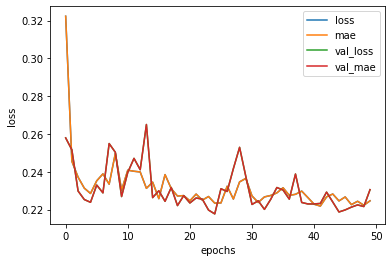

In [18]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [19]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
history_2=model_2.fit(x_train,y,epochs=75,verbose=0,
            validation_data=(x_train,y))

Text(0.5, 0, 'epochs')

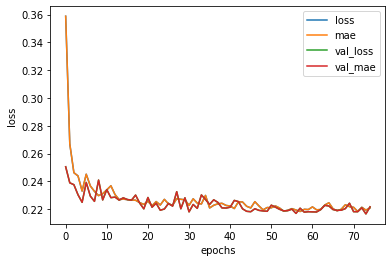

In [20]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [21]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(500),
    tf.keras.layers.Dense(350),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
history_3=model_3.fit(x_train,y,epochs=150,verbose=0,
            validation_data=(x_train,y))

Text(0.5, 0, 'epochs')

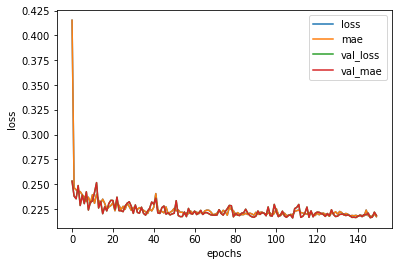

In [22]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [23]:
from google.colab import files
data_to_load = files.upload()

Saving test.csv to test (6).csv


In [24]:
import io 
df_1 = pd.read_csv(io.BytesIO(data_to_load['test.csv']))
df_1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
df_1=df_1.drop("Name",axis=1)
df_1=df_1.drop("Ticket",axis=1)
df_1=df_1.drop("Cabin",axis=1)
df_1=df_1.drop("PassengerId",axis=1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [26]:
df_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [27]:
df_1 = df_1[["Pclass", "Sex", "SibSp","Parch","Fare","Age","Embarked"]]

In [28]:
df_1.head()

,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,3,male,0,0,7.8292,34.5,Q
1,3,female,1,0,7.0000,47.0,S
2,2,male,0,0,9.6875,62.0,Q
3,3,male,0,0,8.6625,27.0,S
4,3,female,1,1,12.2875,22.0,S


In [29]:
age = df_1.iloc[:,5].values
fare=df_1.iloc[:,4].values
age=age.reshape(-1, 1)
fare=fare.reshape(-1, 1)
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
imputer1 = imputer1.fit(age)
age = imputer1.transform(age)
imputer2 = SimpleImputer(missing_values=np.nan, strategy='median')
imputer2 = imputer2.fit(fare)
fare = imputer2.transform(fare)

In [30]:
df_1=df_1.drop("Age",axis=1)
df_1=df_1.drop("Fare",axis=1)

In [31]:
age=pd.DataFrame(age)
fare=pd.DataFrame(fare)
df_1=pd.concat([df_1,age,fare],axis=1)

In [32]:
df_1

,Pclass,Sex,SibSp,Parch,Embarked,0,0
0,3,male,0,0,Q,34.5,7.8292
1,3,female,1,0,S,47.0,7.0000
2,2,male,0,0,Q,62.0,9.6875
3,3,male,0,0,S,27.0,8.6625
4,3,female,1,1,S,22.0,12.2875
...,...,...,...,...,...,...,...
413,3,male,0,0,S,27.0,8.0500
414,1,female,0,0,C,39.0,108.9000
415,3,male,0,0,S,38.5,7.2500
416,3,male,0,0,S,27.0,8.0500


In [33]:
df_1.columns=["Pclass", "Sex", "SibSp","Parch","Embarked","Age","Fare"]

In [34]:
df_1.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,3,male,0,0,Q,34.5,7.8292
1,3,female,1,0,S,47.0,7.0000
2,2,male,0,0,Q,62.0,9.6875
3,3,male,0,0,S,27.0,8.6625
4,3,female,1,1,S,22.0,12.2875


In [35]:
df_1 = df_1[["Pclass", "Sex", "SibSp","Parch","Fare","Age","Embarked"]]

In [36]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      418 non-null    float64
 5   Age       418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [37]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
ct=make_column_transformer(
    (MinMaxScaler(),["Age","Fare"]),
    (OneHotEncoder(handle_unknown="ignore"),["Sex","Embarked","Pclass","SibSp"])
) 
ct.fit(df_1)
x_test=ct.transform(df_1)

In [39]:
y_pred=model_3.predict(x_test)

In [41]:
ans =  np.round_(y_pred)

In [42]:
final = pd.DataFrame(ans)
final.to_excel('Titanic_new2.xlsx', sheet_name = 'New_sheet')